In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
import os
import pandas as pd
import numpy as np 
import librosa
from glob import glob
import IPython.display as ipd
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv('/content/drive/MyDrive/KWS Dataset/Train.csv')

In [36]:
df

,fn,label
0,audio_files/IV38R7F.wav,akawuka
1,audio_files/KM4SKWT.wav,banana
2,audio_files/F5POSU9.wav,obulwadde
3,audio_files/MMVDXG2.wav,nnyaanya
4,audio_files/9TVM96F.wav,pampu
...,...,...
1104,audio_files/QNZECA9.wav,cassava
1105,audio_files/GUIY718.wav,harvesting
1106,audio_files/W38UIGC.wav,farm
1107,audio_files/E04FSN7.wav,nakavundira


In [14]:
!unzip "/content/drive/MyDrive/KWS Dataset/audio_files.zip" -d "/content/drive/MyDrive/audio_files"

Archive:  /content/drive/MyDrive/KWS Dataset/audio_files.zip
   creating: /content/drive/MyDrive/audio_files/audio_files/
  inflating: /content/drive/MyDrive/audio_files/audio_files/A50E89B.wav  
  inflating: /content/drive/MyDrive/audio_files/audio_files/RINOGBM.wav  
  inflating: /content/drive/MyDrive/audio_files/audio_files/B09FSW6.wav  
  inflating: /content/drive/MyDrive/audio_files/audio_files/BRFFD3N.wav  
  inflating: /content/drive/MyDrive/audio_files/audio_files/V71IS4R.wav  
  inflating: /content/drive/MyDrive/audio_files/audio_files/QZPDB6S.wav  
  inflating: /content/drive/MyDrive/audio_files/audio_files/N20L2K7.wav  
  inflating: /content/drive/MyDrive/audio_files/audio_files/9S5G6ZN.wav  
  inflating: /content/drive/MyDrive/audio_files/audio_files/T51P266.wav  
  inflating: /content/drive/MyDrive/audio_files/audio_files/B46J5JM.wav  
  inflating: /content/drive/MyDrive/audio_files/audio_files/8A3HUDV.wav  
  inflating: /content/drive/MyDrive/audio_files/audio_files/48PT

In [15]:
!unzip "/content/drive/MyDrive/KWS Dataset/AdditionalUtterances.zip" -d "/content/drive/MyDrive/more_audio_files"

Archive:  /content/drive/MyDrive/KWS Dataset/AdditionalUtterances.zip
  inflating: /content/drive/MyDrive/more_audio_files/latest_keywords/ebyobulimi/1b5a69c4b88b41eb9577a656e11bb7dd_a1a9cee9821c41babf8c2252f8fe6861.wav  
  inflating: /content/drive/MyDrive/more_audio_files/latest_keywords/ebijjanjalo/2497942026ef4d7e97d47fc2738d7c27_794a6d49aebd40eaa88d81726d957b4c.wav  
  inflating: /content/drive/MyDrive/more_audio_files/latest_keywords/ebijjanjalo/2497942026ef4d7e97d47fc2738d7c27_2a41db3a9a924866a11f2df2f02e2282.wav  
  inflating: /content/drive/MyDrive/more_audio_files/latest_keywords/obulimi/1b5a69c4b88b41eb9577a656e11bb7dd_4dafbce9ce3049ff9c845d3c3d962952.wav  
  inflating: /content/drive/MyDrive/more_audio_files/latest_keywords/obulimi/1b5a69c4b88b41eb9577a656e11bb7dd_32cfca271bbc430ebaa8d2becbbbcdfe.wav  
  inflating: /content/drive/MyDrive/more_audio_files/latest_keywords/ebyobulimi/1b5a69c4b88b41eb9577a656e11bb7dd_d33e310b702b45c18f182bea8dda3699.wav  
  inflating: /content/

In [16]:
!unzip "/content/drive/MyDrive/KWS Dataset/nlp_keywords_29Oct2020.zip" -d "/content/drive/MyDrive/nlp_keywords"

Archive:  /content/drive/MyDrive/KWS Dataset/nlp_keywords_29Oct2020.zip
  inflating: /content/drive/MyDrive/nlp_keywords/nlp_keywords/okusaasaana/2497942026ef4d7e97d47fc2738d7c27_35adc176e0654347b997daca22a1782d.wav  
  inflating: /content/drive/MyDrive/nlp_keywords/nlp_keywords/ppaapaali/6fbfcce2cf21419e97290f9e12934f65_180e49de67c247058ae9b4d3a742f73c.wav  
  inflating: /content/drive/MyDrive/nlp_keywords/nlp_keywords/ppaapaali/6fbfcce2cf21419e97290f9e12934f65_53436bbffb184dfcbe6d837a22a0be12.wav  
  inflating: /content/drive/MyDrive/nlp_keywords/nlp_keywords/ppaapaali/6fbfcce2cf21419e97290f9e12934f65_eda0103a140d4c3ab98e2147b8c853a3.wav  
  inflating: /content/drive/MyDrive/nlp_keywords/nlp_keywords/ppaapaali/6fbfcce2cf21419e97290f9e12934f65_2075008bc16d4f5cabc75c04bd42b3fb.wav  
  inflating: /content/drive/MyDrive/nlp_keywords/nlp_keywords/ppaapaali/d027264654b94950aeb204f64d05d8d7_3578425b93344c1dbaa264299a60b410.wav  
  inflating: /content/drive/MyDrive/nlp_keywords/nlp_keywords/

In [20]:
files =  glob('/content/drive/MyDrive/nlp_keywords/nlp_keywords/abalimi/*.wav')

In [46]:
len(files)

16

In [45]:
ipd.Audio(files[4])

In [50]:
data, sr = librosa.load(files[0])

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [52]:
new = pd.Series(data)

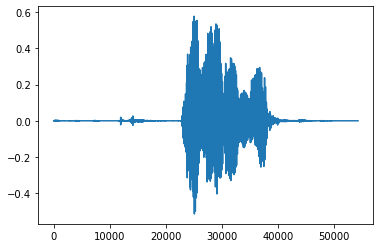

In [53]:
new.plot()

In [54]:
D = librosa.stft(data)

In [57]:
s_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

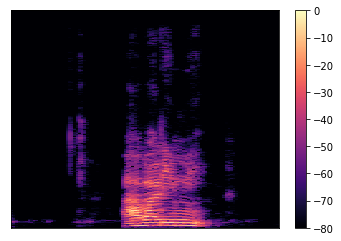

In [58]:
plt.figure()
librosa.display.specshow(s_db)
plt.colorbar()